# Exploratory Data Analysis of Mall Customers

This notebook performs EDA on the Mall Customers dataset.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy.stats import skew

# Set Plot Style
sns.set(style="whitegrid")

# Ensure plots directory exists
os.makedirs('plots', exist_ok=True)

In [11]:
# Load Dataset
try:
    df = pd.read_csv('Mall_Customers.csv')
    # Rename Genre to Gender if present
    if 'Genre' in df.columns:
        df.rename(columns={'Genre': 'Gender'}, inplace=True)
    print("Dataset Loaded Successfully.")
except FileNotFoundError:
    print("Error: Mall_Customers.csv not found.")

Dataset Loaded Successfully.


## 1. Data Understanding

In [12]:
print("Shape:", df.shape)
print("\nColumns:", list(df.columns))
print("\nData Types:")
print(df.dtypes)
print("\nMissing Values:")
print(df.isnull().sum())

Shape: (200, 5)

Columns: ['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

Data Types:
CustomerID                int64
Gender                      str
Age                       int64
Annual Income (k$)        int64
Spending Score (1-100)    int64
dtype: object

Missing Values:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


## 2. Measures of Central Tendency & Dispersion

In [13]:
numerical_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for col in numerical_cols:
    print(f"\n--- {col} ---")
    print(f"Mean: {df[col].mean():.2f}")
    print(f"Median: {df[col].median():.2f}")
    print(f"Mode: {df[col].mode()[0]}")
    print(f"Range: {df[col].max() - df[col].min()}")
    print(f"Variance: {df[col].var():.2f}")
    print(f"Std Dev: {df[col].std():.2f}")
    
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    print(f"IQR: {IQR:.2f}")


--- Age ---
Mean: 38.85
Median: 36.00
Mode: 32
Range: 52
Variance: 195.13
Std Dev: 13.97
IQR: 20.25

--- Annual Income (k$) ---
Mean: 60.56
Median: 61.50
Mode: 54
Range: 122
Variance: 689.84
Std Dev: 26.26
IQR: 36.50

--- Spending Score (1-100) ---
Mean: 50.20
Median: 50.00
Mode: 42
Range: 98
Variance: 666.85
Std Dev: 25.82
IQR: 38.25


## 3. Distribution Analysis

In [14]:
for col in numerical_cols:
    skewness = skew(df[col])
    print(f"\n{col} Skewness: {skewness:.2f}")
    if abs(skewness) < 0.5:
        print("Distribution: Approximately Symmetric")
    elif skewness > 0:
        print("Distribution: Positively Skewed")
    else:
        print("Distribution: Negatively Skewed")

    # Outlier Detection
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    if not outliers.empty:
        print(f"Potential Outliers: {len(outliers)} values: {outliers.values}")


Age Skewness: 0.48
Distribution: Approximately Symmetric

Annual Income (k$) Skewness: 0.32
Distribution: Approximately Symmetric
Potential Outliers: 2 values: [137 137]

Spending Score (1-100) Skewness: -0.05
Distribution: Approximately Symmetric


## 4. Visualizations

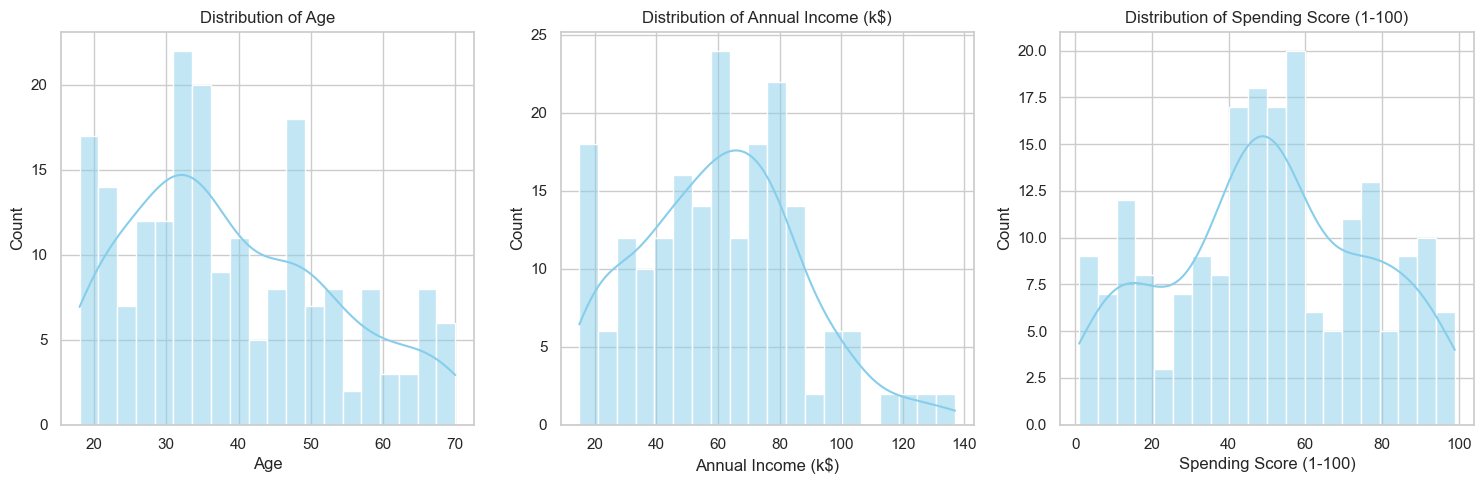

In [15]:
# Histograms
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[col], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.savefig('plots/histograms.png')
plt.show()

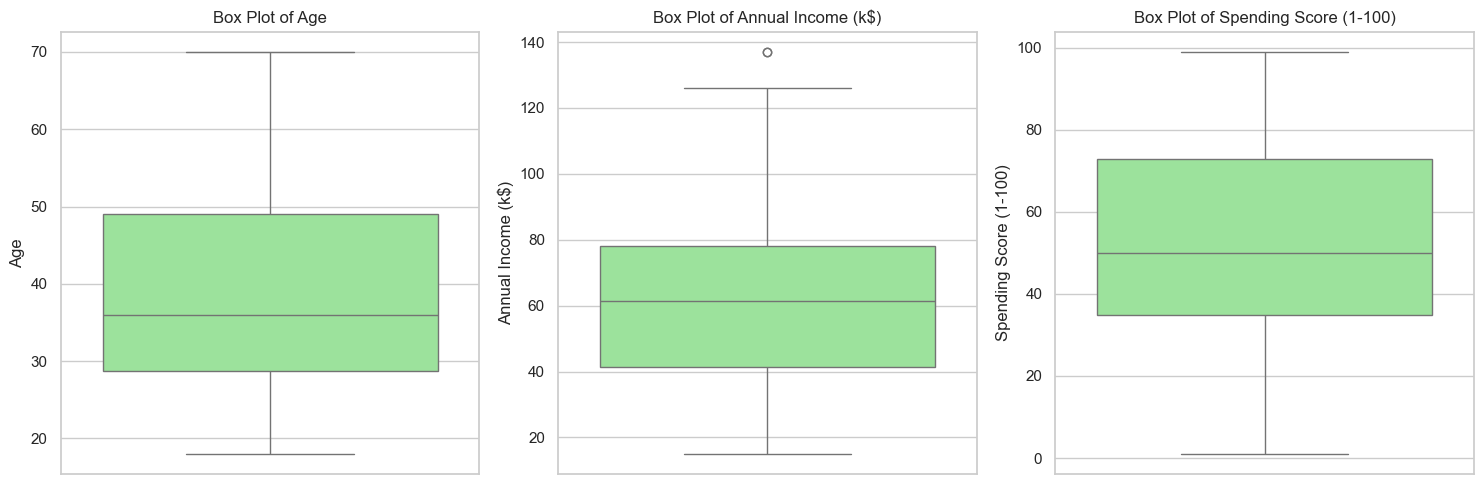

In [16]:
# Box Plots
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col], color='lightgreen')
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.savefig('plots/boxplots.png')
plt.show()

Gender
Female    112
Male       88
Name: count, dtype: int64
Gender
Female    56.0
Male      44.0
Name: proportion, dtype: float64


C:\Users\AMITAVA\AppData\Local\Temp\ipykernel_20920\2397581335.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='pastel')


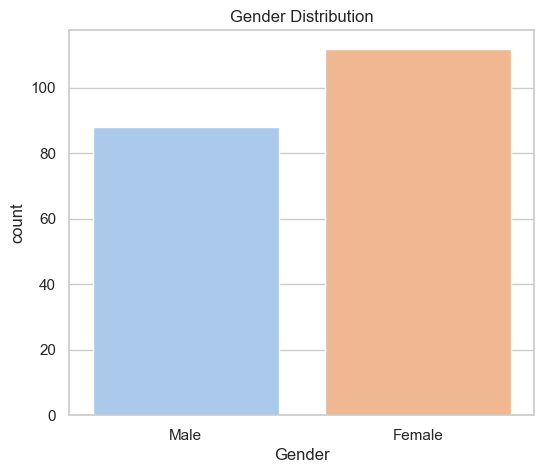

In [17]:
# Categorical Analysis: Gender
print(df['Gender'].value_counts())
print(df['Gender'].value_counts(normalize=True) * 100)

plt.figure(figsize=(6, 5))
sns.countplot(x='Gender', data=df, palette='pastel')
plt.title('Gender Distribution')
plt.savefig('plots/gender_bar.png')
plt.show()

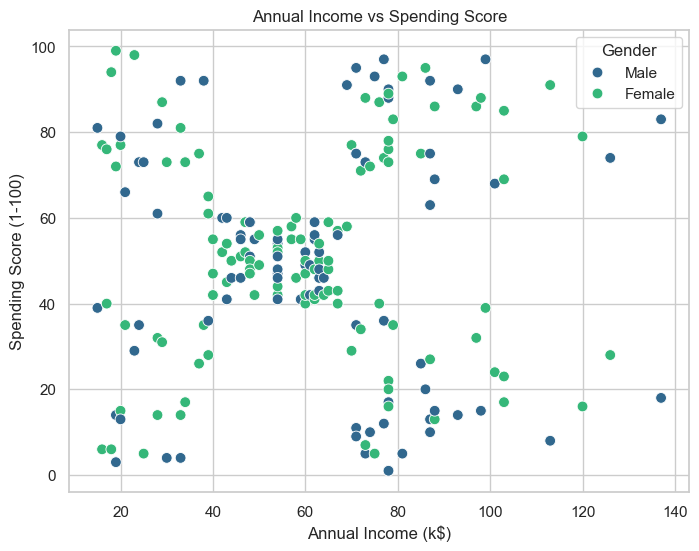

In [18]:
# Scatter Plot: Income vs Spending Score
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', data=df, palette='viridis', s=60)
plt.title('Annual Income vs Spending Score')
plt.savefig('plots/scatter_income_score.png')
plt.show()